In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
! pip install pyforest
from pyforest import *
lazy_imports()

['import datetime as dt',
 'from sklearn.model_selection import GridSearchCV',
 'import re',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.linear_model import Lasso',
 'import tensorflow as tf',
 'import tqdm',
 'import awswrangler as wr',
 'from sklearn.manifold import TSNE',
 'import numpy as np',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.preprocessing import MinMaxScaler',
 'import spacy',
 'import os',
 'from PIL import Image',
 'from sklearn import svm',
 'from sklearn.impute import SimpleImputer',
 'import matplotlib.pyplot as plt',
 'from sklearn.linear_model import RidgeCV',
 'import xgboost as xgb',
 'from scipy import signal as sg',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly as py',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.decomposition import PCA',
 'import pandas as pd',
 'from dask import dataframe as dd',
 'import skima

In [3]:
df=pd.read_csv("D://ML Data//breastCancer.csv")

<IPython.core.display.Javascript object>

In [4]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

## Data Preprocessing

In [6]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
df.shape

(699, 11)

In [8]:
df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [9]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [10]:
df[df['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [11]:
digits_in_bare_nucleoli=pd.DataFrame(df.bare_nucleoli.str.isdigit())

<IPython.core.display.Javascript object>

In [12]:
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [13]:
digits_in_bare_nucleoli[digits_in_bare_nucleoli['bare_nucleoli']==False]

,bare_nucleoli
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [14]:
df=df.replace('?',np.nan)

<IPython.core.display.Javascript object>

In [15]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [16]:
df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [17]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [18]:
df=df.fillna(df.median())

In [19]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [20]:
df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [21]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [22]:
df.bare_nucleoli=df.bare_nucleoli.astype('int64')

In [23]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## Exploratory Data Analysis

In [24]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [25]:
df=df.drop('id',axis=1)

In [26]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [27]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Bivariate Analysis

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='class', ylabel='Density'>

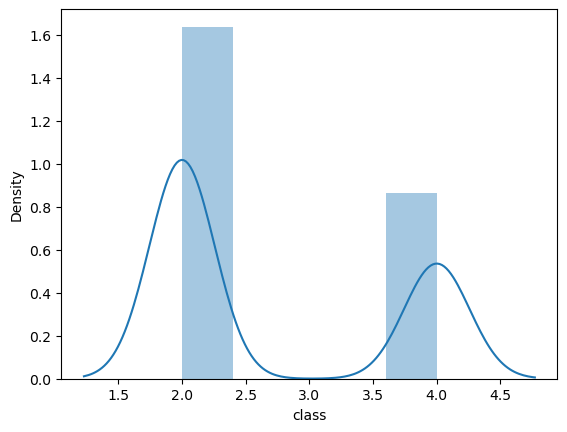

In [28]:
sns.distplot(df['class'])

## Multivariate Analysis

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'size_uniformity'}>,
        <AxesSubplot:title={'center':'shape_uniformity'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'epithelial_size'}>,
        <AxesSubplot:title={'center':'bare_nucleoli'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

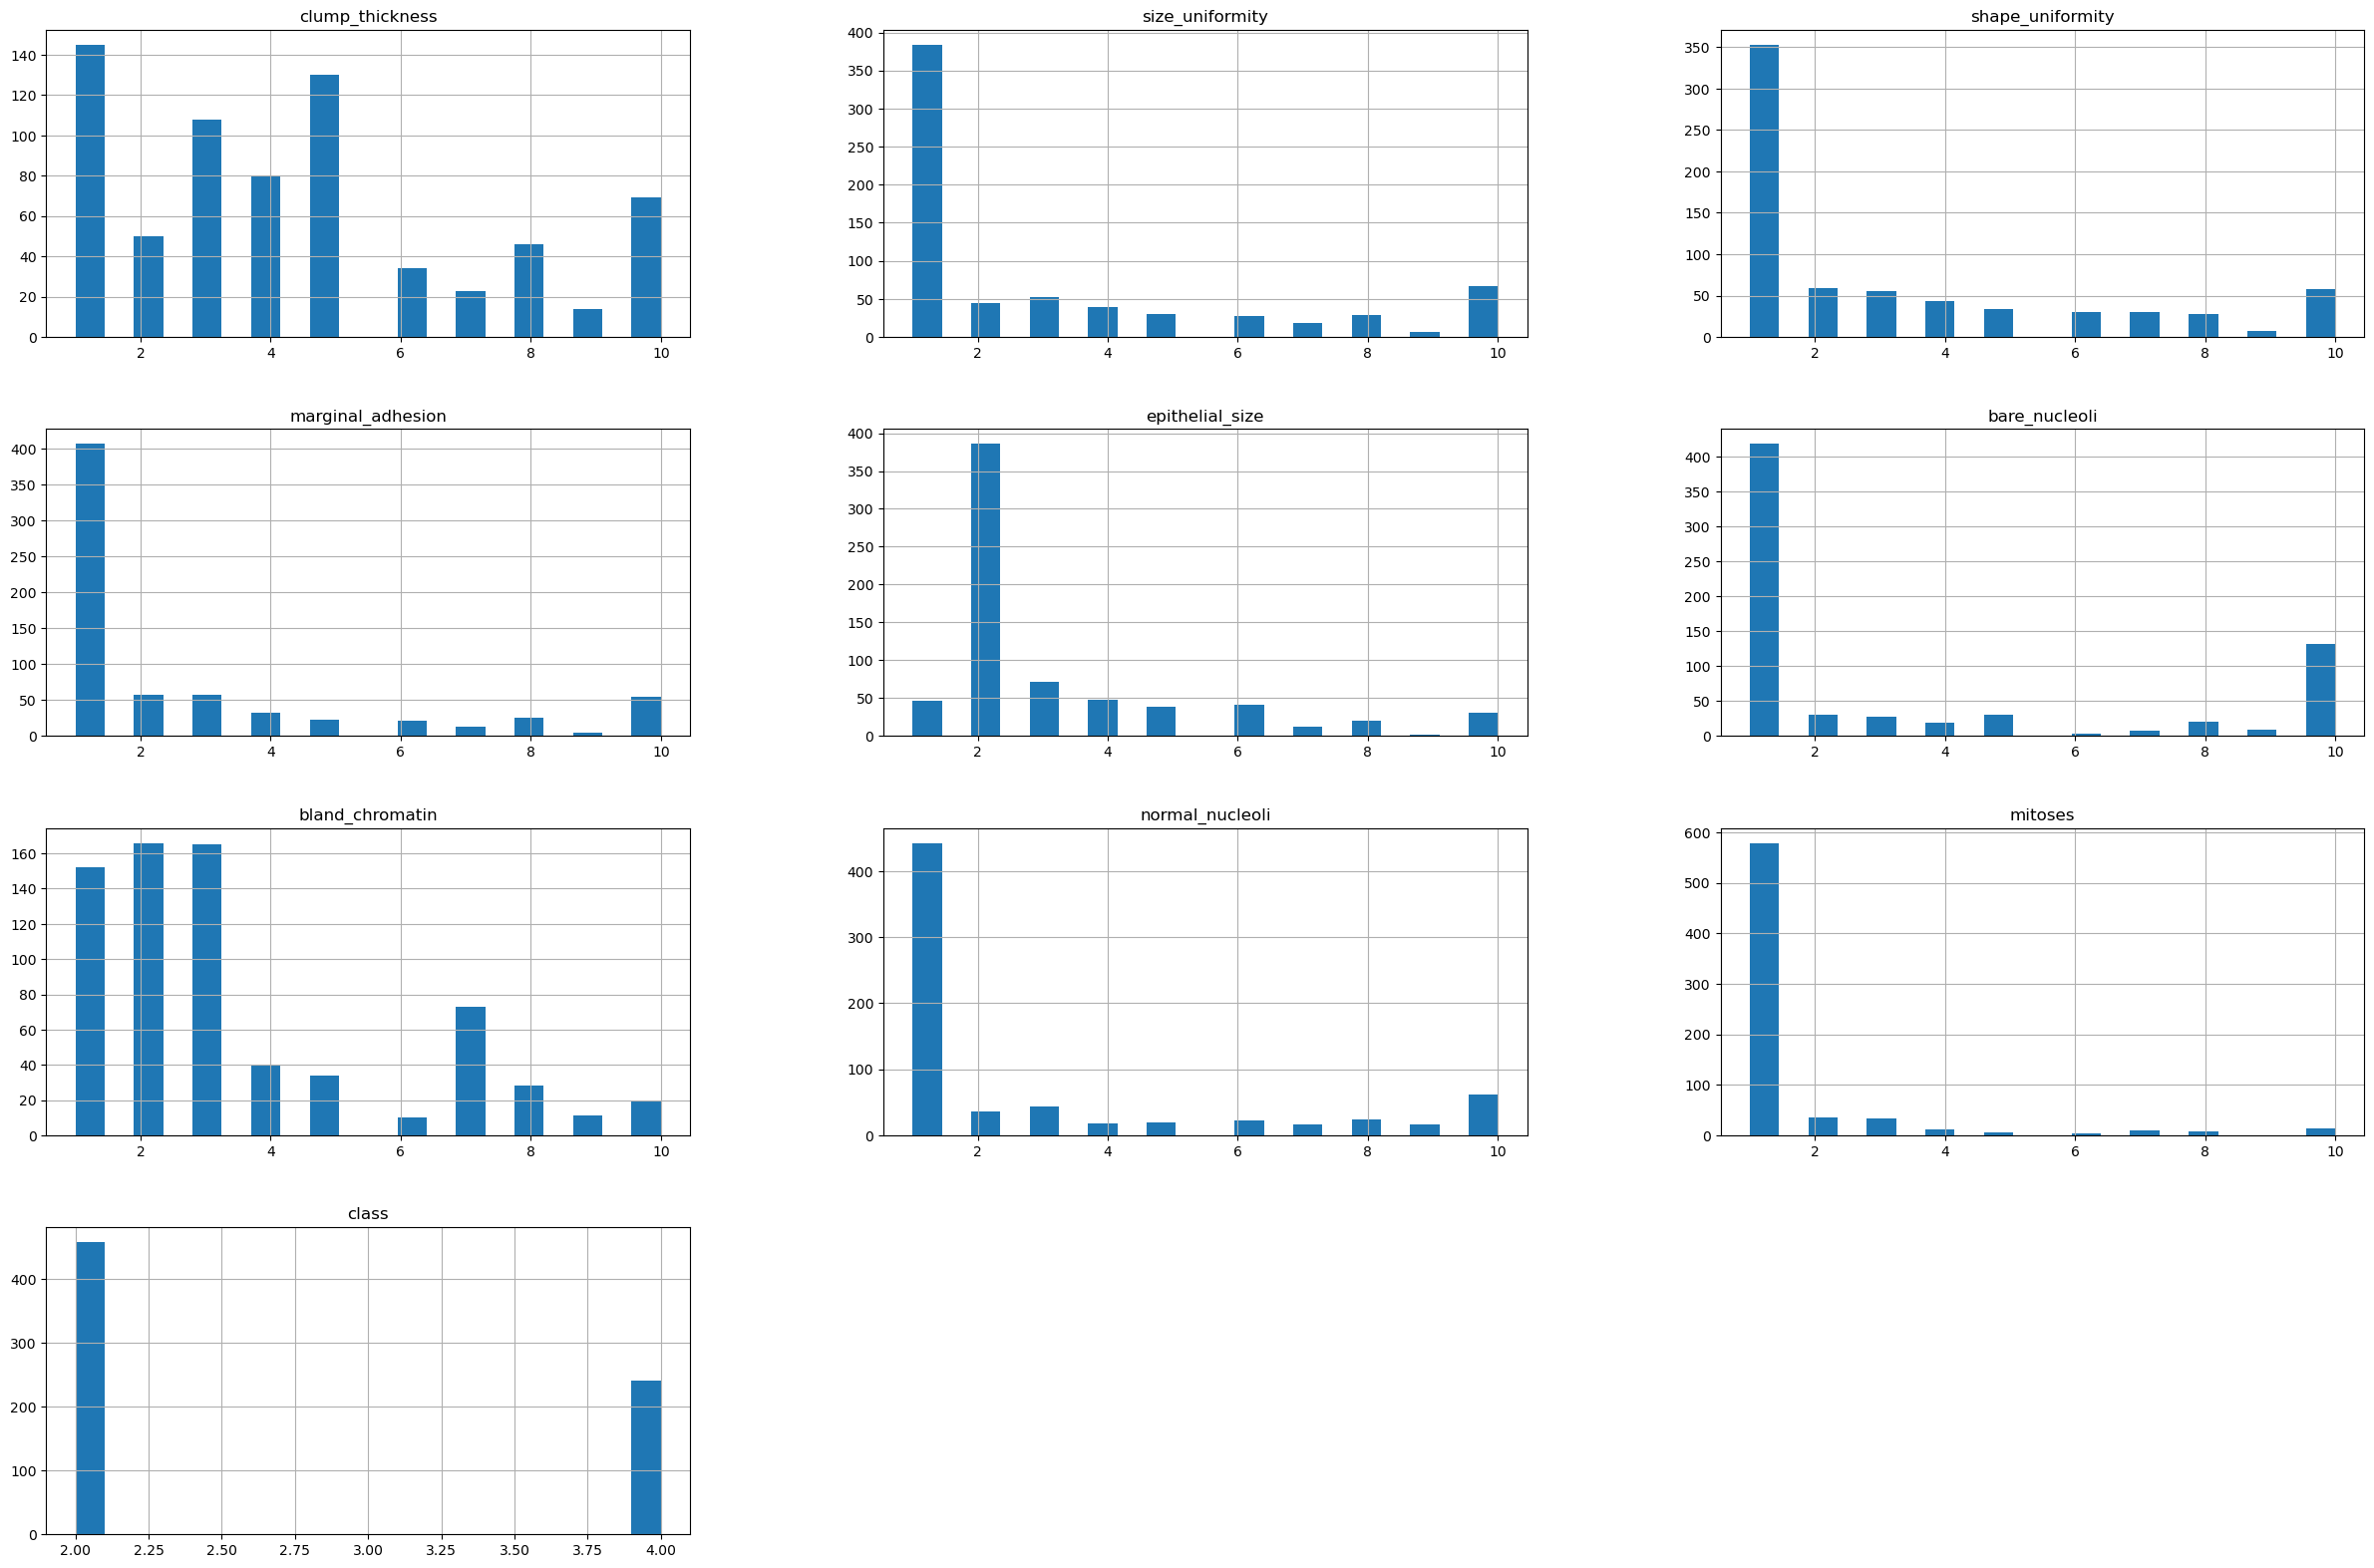

In [29]:
df.hist(bins=20,figsize=(30,30),layout=(6,3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'clump_thickness'),
  Text(1, 0, 'size_uniformity'),
  Text(2, 0, 'shape_uniformity'),
  Text(3, 0, 'marginal_adhesion'),
  Text(4, 0, 'epithelial_size'),
  Text(5, 0, 'bare_nucleoli'),
  Text(6, 0, 'bland_chromatin'),
  Text(7, 0, 'normal_nucleoli'),
  Text(8, 0, 'mitoses'),
  Text(9, 0, 'class')])

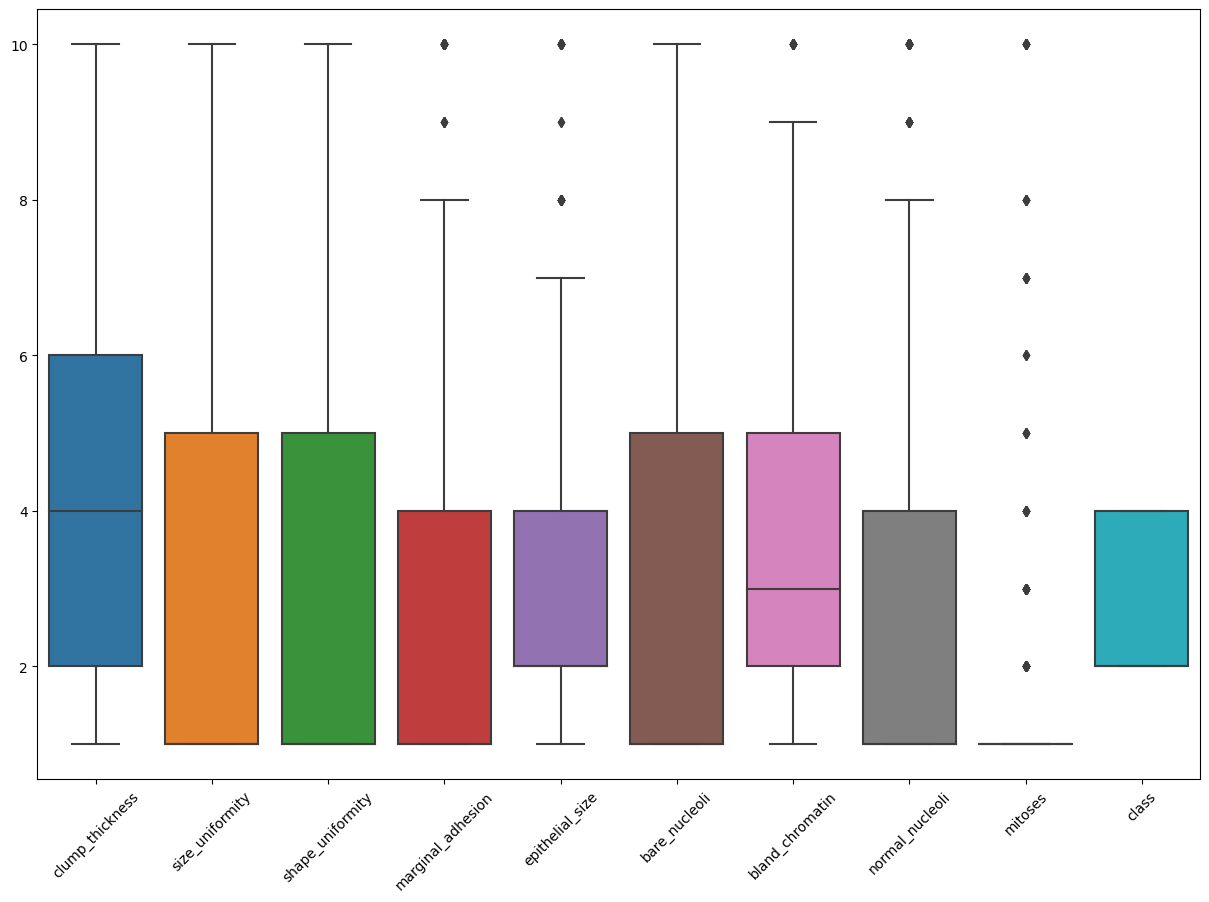

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)

In [31]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

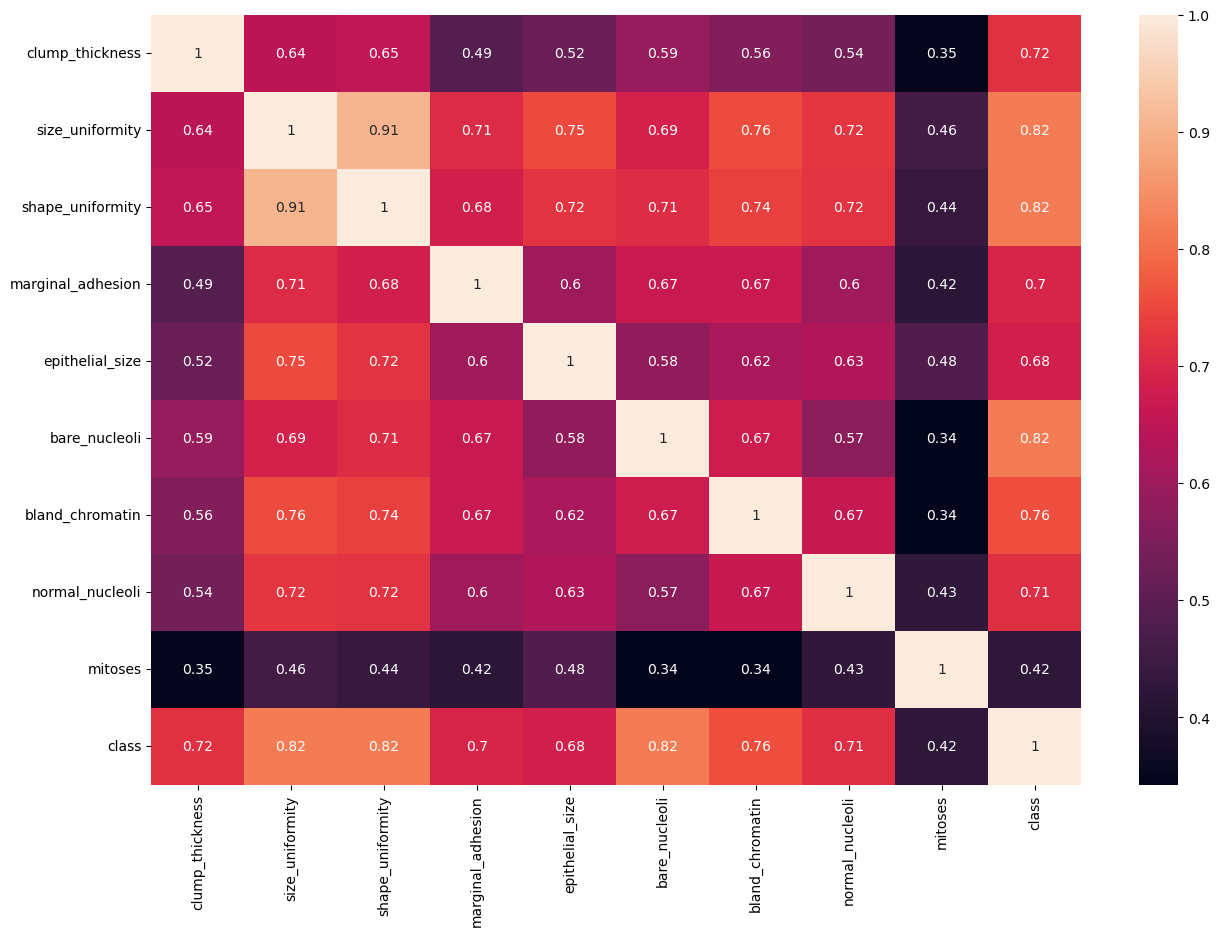

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<IPython.core.display.Javascript object>

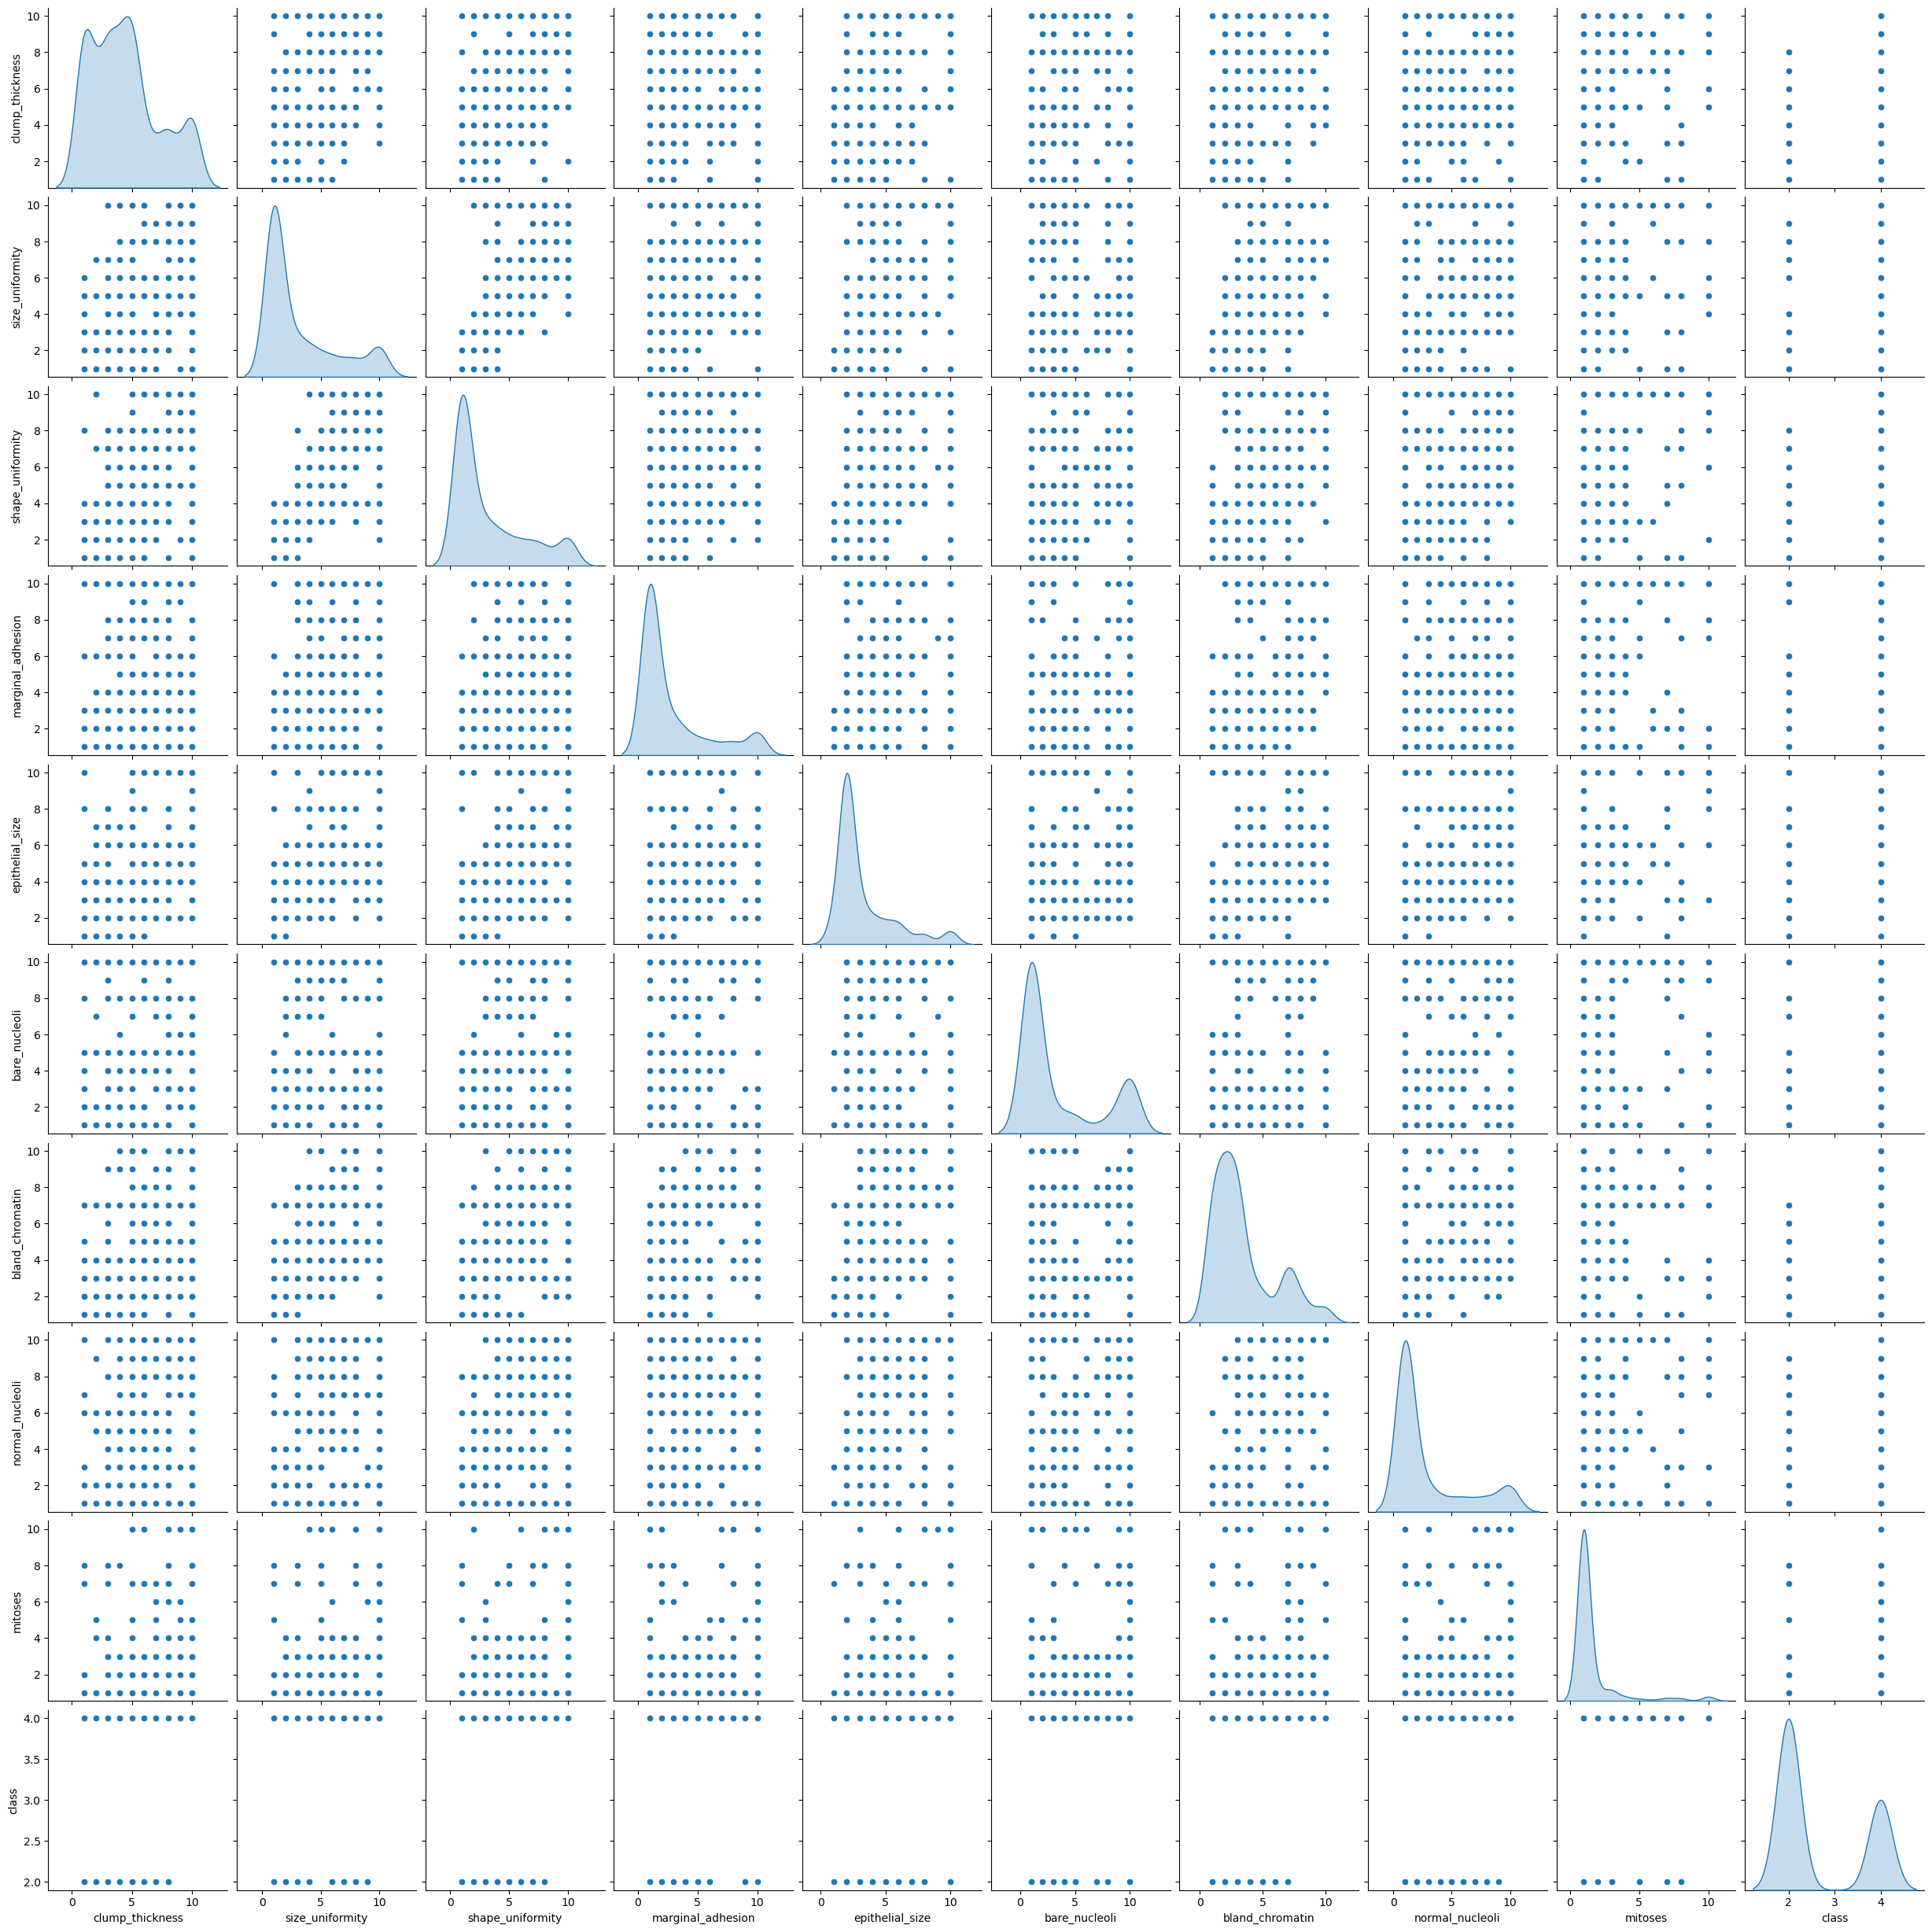

In [33]:
sns.pairplot(df,diag_kind='kde')

## Building our Model

In [34]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [35]:
X=df.drop('class',axis=1)
y=df['class']

In [36]:
X

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [37]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
82,5,2,1,1,2,1,3,1,1
51,5,3,3,4,2,4,3,4,1
220,1,1,1,2,2,1,3,1,1
559,5,1,1,1,2,1,2,1,1
544,2,1,3,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2,7,8,10
106,10,10,10,8,2,10,4,1,1
270,8,4,7,1,3,10,3,9,2
435,10,8,10,1,3,10,5,1,1


In [40]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
158,1,1,2,1,3,1,1,1,1
499,4,1,1,1,2,1,2,1,1
396,3,1,1,1,2,1,3,1,1
155,5,5,5,6,3,10,3,1,1
321,3,1,1,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
24,1,1,1,1,2,1,3,1,1
218,6,10,7,7,6,4,8,10,2
431,5,1,1,3,4,1,3,2,1
281,2,1,1,2,2,1,3,1,1


In [41]:
y_train

82     2
51     4
220    2
559    2
544    2
      ..
71     4
106    4
270    4
435    4
102    2
Name: class, Length: 559, dtype: int64

In [42]:
y_test

158    2
499    2
396    2
155    4
321    2
      ..
24     2
218    4
431    2
281    2
110    2
Name: class, Length: 140, dtype: int64

## KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
KNN_1=KNeighborsClassifier()

In [45]:
KNN_1.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
pred_1=KNN_1.predict(X_test)

In [47]:
KNN_1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [48]:
KNN_1.score(X_test, y_test)

0.9857142857142858

## Support Vector Machine

In [49]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [50]:
pred_2=svc.predict(X_test)
pred_2

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

In [51]:
svc.score(X_test, y_test)

0.9714285714285714

In [52]:
knn_pred=pd.DataFrame(pred_1)
svc_pred=pd.DataFrame(pred_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
df1=pd.concat([knn_pred,svc_pred],axis=1)

<IPython.core.display.Javascript object>

In [56]:
df1

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
135,2,2
136,4,4
137,2,2
138,2,2


In [57]:
df1.columns=[['KNN_Predictions','SVC_Predictions']]

In [58]:
df1

,KNN_Predictions,SVC_Predictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
135,2,2
136,4,4
137,2,2
138,2,2


In [60]:
from sklearn.metrics import classification_report

In [64]:
print("KNN Classification Report")
print(classification_report(y_test,pred_1))

KNN Classification Report
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



In [65]:
print("SVC Classification Report")
print(classification_report(y_test,pred_2))

SVC Classification Report
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



Confusion Matrix for KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

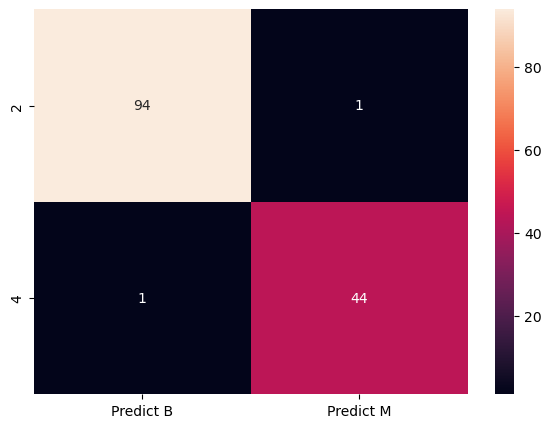

In [67]:
from sklearn import metrics
print("Confusion Matrix for KNN")
cm=metrics.confusion_matrix(y_test,pred_1,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predict B','Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

Confusion Matrix for SVC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

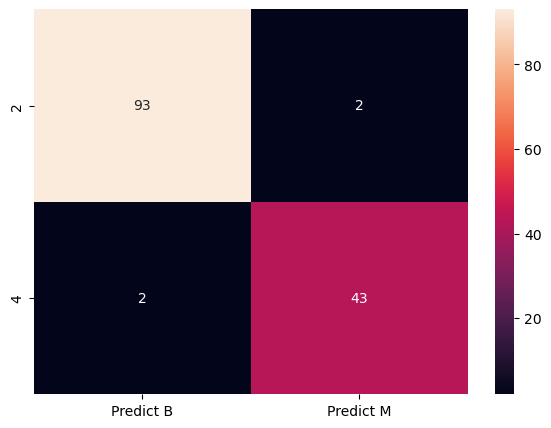

In [68]:
from sklearn import metrics
print("Confusion Matrix for SVC")
cm=metrics.confusion_matrix(y_test,pred_2,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predict B','Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)